# Airline Crew Scheduling – Backtracking Approach
Assignment 4 — Design and Analysis of Algorithms Lab

This notebook solves the crew‑flight assignment problem using backtracking and profiling.


In [3]:
flights = [('F1', 9, 11), ('F2', 10, 12), ('F3', 13, 15), ('F4', 16, 18)]
crew_members = ['C1', 'C2', 'C3']
REST_TIME = 1

def is_valid_assignment(existing, new):
    for _, s, e in existing:
        if not (new[2] + REST_TIME <= s or new[1] >= e + REST_TIME):
            return False
    return True

solutions = []

def backtrack(idx, assignment):
    if idx == len(flights):
        solutions.append({c: [f[0] for f in assignment[c]] for c in crew_members})
        return
    flight = flights[idx]
    for c in crew_members:
        if is_valid_assignment(assignment[c], flight):
            assignment[c].append(flight)
            backtrack(idx + 1, assignment)
            assignment[c].pop()

assignment = {c: [] for c in crew_members}
backtrack(0, assignment)
solutions[:3]  # show sample

[{'C1': ['F1', 'F3', 'F4'], 'C2': ['F2'], 'C3': []},
 {'C1': ['F1', 'F3'], 'C2': ['F2', 'F4'], 'C3': []},
 {'C1': ['F1', 'F3'], 'C2': ['F2'], 'C3': ['F4']}]

## Profiling Time Complexity

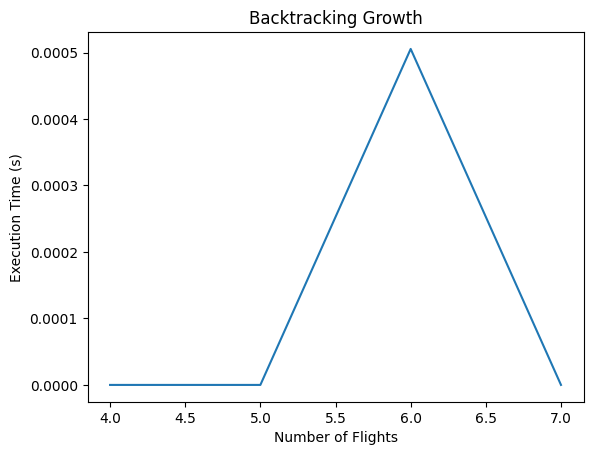

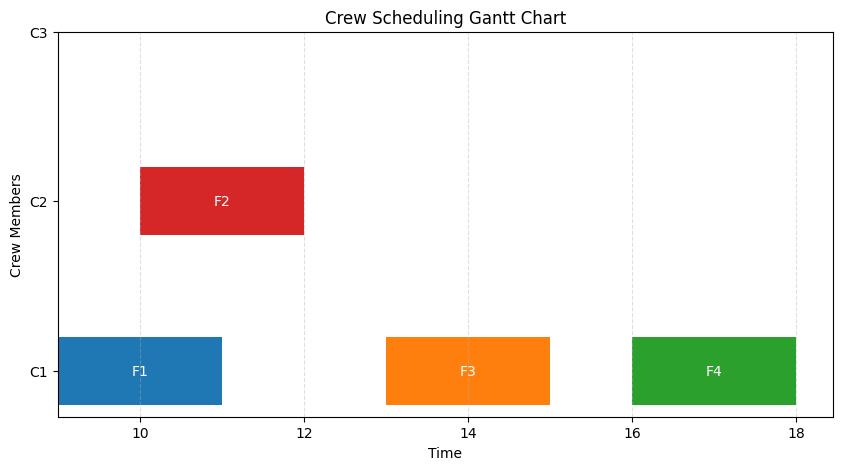

In [13]:
import time
import matplotlib.pyplot as plt

sizes = [4,5,6,7]
times = []

def run(n):
    fl = [('F'+str(i), i*2, i*2+1) for i in range(n)]
    ass = {c: [] for c in crew_members}
    sol = []
    def bt(i):
        if i==len(fl): sol.append(1); return
        for c in crew_members:
            bt(i+1)
    bt(0)

for n in sizes:
    t = time.time()
    run(n)
    times.append(time.time()-t)

plt.plot(sizes, times)
plt.xlabel('Number of Flights')
plt.ylabel('Execution Time (s)')
plt.title('Backtracking Growth')
plt.show()



def plot_gantt(assignments, flights):
    """
    assignments = {
        'C1': ['F1','F3'],
        'C2': ['F2'],
        ...
    }
    flights = list of tuples: ('F1', start, end)
    """

    # Convert flight list into lookup dictionary
    flight_dict = {f[0]: (f[1], f[2]) for f in flights}

    fig, ax = plt.subplots(figsize=(10, 5))

    y_ticks = []
    y_labels = []
    y = 0

    # Plot each crew member
    for crew, fl_list in assignments.items():
        for fl in fl_list:
            start, end = flight_dict[fl]
            ax.barh(crew, end - start, left=start, height=0.4)
            ax.text(start + (end - start)/2, y, fl, va='center', ha='center', color='white')

        y_ticks.append(y)
        y_labels.append(crew)
        y += 1

    ax.set_xlabel("Time")
    ax.set_ylabel("Crew Members")
    ax.set_title("Crew Scheduling Gantt Chart")
    ax.set_yticks(range(len(assignments)))
    ax.set_yticklabels(assignments.keys())
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.show()


# Example usage (after running backtracking)
sample_solution = solutions[0]    # pick any valid assignment
plot_gantt(sample_solution, flights)
